In [1]:
import numpy as np
import psi4
psi4.core.set_output_file("mghp.out")

In [2]:
mol_str = """
Mg
H 1 2.2
symmetry c1
1 1
"""
mol_tmpl = """
Mg
H 1 **R**
symmetry c1
1 1
"""

#    Doubly Occupied:                                                      
#                 1                      2                   3
#       1A1   -49.376732     2A1    -4.102335     1B1    -2.621566  
#       1B2    -2.621566     3A1    -2.618459     4A1    -0.560102  
#                  4                    5                    6
#    Virtual:                                                              
#                   7                   8                   9
#       5A1    -0.254926     2B1    -0.151918     2B2    -0.151918  
#                 10                   11                  12
#       6A1    -0.077576     7A1    -0.042450     3B2    -0.003958  
#                  13                   14                  15
#       3B1    -0.003958     8A1    -0.002846     4B1     0.087198  
#       4B2     0.087198     9A1     0.088428     1A2     0.088428 

#       (8, 12) -> [6, 0, 3, 3]
#       (10,12) -> [7, 0, 2, 3]
#       (10,14) -> [8, 0, 3, 3]

rs = np.linspace(1.1, 3.5, 50)

dz_options_dict = {
    "basis": "cc-pVDZ",
    "frozen_docc" : [2],
    "active" : [12],
    "num_roots" : 3
}

tz_options_dict = {
    "basis": "cc-pVTZ",
    "frozen_docc" : [2],
    "active" : [12],
    "num_roots" : 3
}

#mol = psi4.geometry(mol_str)
#psi4.set_options(options_dict)
#scf_e, wfn = psi4.energy('SCF', return_wfn=True)
#fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)

In [3]:
tz_eg = []
tz_e1 = []
dz_eg = []
dz_e1 = []
for r_val in rs:
    # dz calc first
    psi4.set_options(tz_options_dict)
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    tz_en, wfn = psi4.energy('fci', ref_wfn = wfn, molecule=mol, return_wfn=True)
    tz_eg.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    tz_e1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    
    # set tz options
    #psi4.set_options(tz_options_dict)
    #scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    #tz_en, wfn = psi4.energy('fci', ref_wfn = wfn, molecule=mol, return_wfn=True)
    #tz_eg.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    #tz_e1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    



    

In [4]:
print(tz_eg)
print(tz_e1)

[-199.77689174327756, -199.8079981812002, -199.8334570792231, -199.85411418995562, -199.87071205517546, -199.88389193601708, -199.89419583491576, -199.90207790766493, -199.90792071584357, -199.9120496150407, -199.91474338320032, -199.916241930954, -199.9167521826195, -199.91645279453004, -199.9154980528341, -199.9140211348626, -199.9121368519914, -199.90994396290995, -199.9075271313647, -199.90495859216435, -199.90229958052456, -199.89960157199238, -199.89690737228625, -199.8942520897879, -199.89166401510926, -199.8891654274452, -199.88677333912943, -199.88450018687664, -199.88235447280462, -199.8803413560761, -199.8784631905879, -199.87672002028043, -199.87511001328247, -199.87362985032627, -199.87227506162353, -199.8710403172532, -199.86991967418922, -199.86890678263921, -199.8679950690651, -199.8671779290221, -199.8664489638924, -199.86580185152442, -199.8652300763846, -199.86472743632115, -199.86428819176956, -199.86390582380247, -199.8635772493686, -199.86329678076868, -199.863059

In [5]:
dz_eg_ar = np.array([-199.77400948661273, -199.80505415601044, -199.8303370066274, -199.85077734981462, -199.86716348779336, -199.88016318373528, -199.89033639388182, -199.89814969790163, -199.90399115102605, -199.90818425799168, -199.91100018144328, -199.91266782079848, -199.91338180991622, -199.9133087151639, -199.9125917953914, -199.91135466924675, -199.9097041773049, -199.90773265822253, -199.90551979757035, -199.90313416133358, -199.90063449241987, -199.89807082493843, -199.8954854563514, -199.8929138067333, -199.8903851851368, -199.88792348045448, -199.8855477861667, -199.88327296956297, -199.88111019220895, -199.8790673875312, -199.87714968927648, -199.87535981281314, -199.8736984106054, -199.87216440482598, -199.87075528680754, -199.86946738272215, -199.8682960972374, -199.8672361302037, -199.86628167081074, -199.8654265870073, -199.86466457422316, -199.86398918863648, -199.8633937621726, -199.8628716963521, -199.8624174470205, -199.8620247971725, -199.8616880143403, -199.86140163043942, -199.86116044120155, -199.86095949084265])

dz_e1_ar = np.array([-199.55327721247812, -199.58753195290066, -199.61649359445664, -199.6409906083231, -199.66171893500322, -199.67926070578648, -199.69410063511577, -199.70664086731296, -199.7172144629075, -199.72609741562206, -199.73351906418281, -199.73967087399987, -199.7447136909511, -199.74878365106065, -199.75199695736777, -199.75445372409703, -199.75624106075313, -199.7574355363127, -199.75810513724443, -199.7583108113995, -199.75810767485873, -199.7575459465071, -199.75667166506867, -199.75552723420813, -199.75415183299026, -199.75258172157345, -199.75085046599733, -199.74898910139865, -199.74702625115785, -199.74498822380136, -199.7428990623885, -199.7407806231809, -199.7386525938748, -199.73653255770705, -199.7344361028782, -199.73237683061944, -199.7303665237861, -199.7284151085725, -199.72653094467887, -199.72472085350526, -199.72299027398526, -199.7213432846806, -199.7197824929557, -199.71830939864518, -199.71692554698467, -199.71563062875407, -199.71442382264578, -199.7133036081557, -199.71226782732674, -199.7113137358446])

tz_eg_ar = np.array([-199.77689174327756, -199.8079981812002, -199.8334570792231, -199.85411418995562, -199.87071205517546, -199.88389193601708, -199.89419583491576, -199.90207790766493, -199.90792071584357, -199.9120496150407, -199.91474338320032, -199.916241930954, -199.9167521826195, -199.91645279453004, -199.9154980528341, -199.9140211348626, -199.9121368519914, -199.90994396290995, -199.9075271313647, -199.90495859216435, -199.90229958052456, -199.89960157199238, -199.89690737228625, -199.8942520897879, -199.89166401510926, -199.8891654274452, -199.88677333912943, -199.88450018687664, -199.88235447280462, -199.8803413560761, -199.8784631905879, -199.87672002028043, -199.87511001328247, -199.87362985032627, -199.87227506162353, -199.8710403172532, -199.86991967418922, -199.86890678263921, -199.8679950690651, -199.8671779290221, -199.8664489638924, -199.86580185152442, -199.8652300763846, -199.86472743632115, -199.86428819176956, -199.86390582380247, -199.8635772493686, -199.86329678076868, -199.863059943429, -199.8628625706527])
tz_e1_ar = np.array([-199.5545844547997, -199.5887663489742, -199.61783503126537, -199.6425395959075, -199.6635199681433, -199.68132077357853, -199.69640042962112, -199.70914253254685, -199.7198688153548, -199.7288507317742, -199.73631865698943, -199.74246904442813, -199.7474701055133, -199.75146641853394, -199.7545827214856, -199.7569270610558, -199.75859342697638, -199.75966397285606, -199.76021090125982, -199.76029806988615, -199.75998235806537, -199.7593148195681, -199.7583416395553, -199.7571049101161, -199.75564323944084, -199.75399221241818, -199.7521847240364, -199.75025120961013, -199.7482197967674, -199.74611640294168, -199.74396479904507, -199.74178665577713, -199.73960158441415, -199.73742717973863, -199.73527906936985, -199.73317097138602, -199.73111476074115, -199.72912054525148, -199.72719675852213, -199.7253502977789, -199.72358670494117, -199.72191006287358, -199.7203228921649, -199.7188266673176, -199.7174219850428, -199.7161076840264, -199.71488426710937, -199.71374926630915, -199.7127003969041, -199.71173491339755])

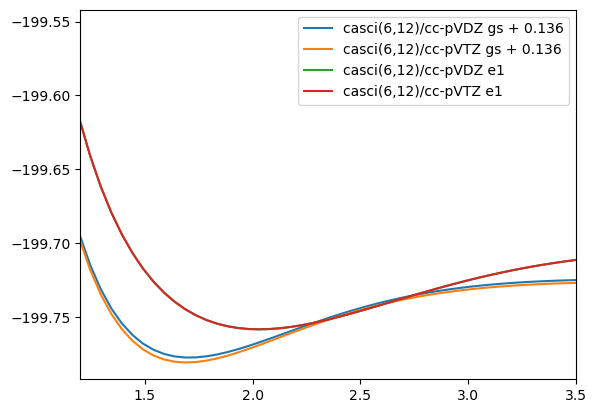

In [7]:
from matplotlib import pyplot as plt
#plt.plot(rs, scf_e, label="rhf")
plt.plot(rs, dz_eg_ar+0.136, label="casci(6,12)/cc-pVDZ gs + 0.136")
plt.plot(rs, tz_eg_ar+0.136, label="casci(6,12)/cc-pVTZ gs + 0.136")
plt.plot(rs, dz_e1_ar, label="casci(6,12)/cc-pVDZ e1")
plt.plot(rs, dz_e1_ar, label="casci(6,12)/cc-pVTZ e1")
plt.xlim(1.2,3.5)
#plt.ylim(-199.92, -199.7)
plt.legend()

#pes = np.array([[rs], [eg], [e1]])
#np.save("mghp_pes_casci_8_12_ccPVTZ.npy", pes)

In [ ]:
ci_e, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
ener = psi4.get_variable('CI ROOT 0 -> ROOT 2 EXCITATION ENERGY')
print(fci_energy)
print(ener)



In [ ]:

#transition density matrix
opdm_0 = wfn.get_opdm(1,4,"SUM", True)
dm = opdm_0.to_array()
print(dm)


#two electron integral
mints = psi4.core.MintsHelper(wfn.basisset())
I = mints.ao_eri()
D = I.to_array()
print(I.np)

#get transition dipole moment
props = ['DIPOLE', 'TRANSITION_DIPOLE']
psi4.properties('detci',properties=props)
M = ['X','Y','Z']
for i in range(6):
        for j in M:
                dipole=psi4.get_variable('CI ROOT %d -> ROOT %d DIPOLE %s'%(i,i+1,j))
                print('CI ROOT %d -> ROOT %d DIPOLE %s = %s'%(i,i+1,j,dipole))

Should look at 0->2 transition polarized along Y or the 0->5 transition polarized along Y
0->2: omega = 

At the CASCI(10,10)/cc-pVDZ level:
   @CI 16:     0   -383.432630675633   2.3093E-14   1.5364E-06 c
   @CI 16:     1   -383.229174086435   -7.1054E-15   2.1810E-06 c
   @CI 16:     2   -383.214958443052   3.5527E-15   2.5621E-06 c
   @CI 16:     3   -383.160173307314   -1.4211E-14   2.8093E-06 c
   @CI 16:     4   -383.150441547330   -9.3614E-11   3.6503E-06 c
   @CI 16:     5   -383.136370898717   2.8422E-14   2.1271E-06 c


Properties computed using the CI ROOT 0 -> ROOT 1 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0109742            0.0000000           -0.0109742
 Dipole Y            :          0.0000004            0.0000000            0.0000004
 Dipole Z            :          0.0000006            0.0000000            0.0000006
 Magnitude           :                                                    0.0109742

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 2 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000053            0.0000000            0.0000053
 Dipole Y            :         -0.8601870            0.0000000           -0.8601870
 Dipole Z            :         -0.0000003            0.0000000           -0.0000003
 Magnitude           :                                                    0.8601870

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 3 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000005            0.0000000           -0.0000005
 Dipole Y            :          0.0000002            0.0000000            0.0000002
 Dipole Z            :          0.0000026            0.0000000            0.0000026
 Magnitude           :                                                    0.0000026

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 4 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000016            0.0000000            0.0000016
 Dipole Y            :          0.0000007            0.0000000            0.0000007
 Dipole Z            :          0.0000006            0.0000000            0.0000006
 Magnitude           :                                                    0.0000018

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 5 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000277            0.0000000           -0.0000277
 Dipole Y            :          1.3532848            0.0000000            1.3532848
 Dipole Z            :         -0.0000043            0.0000000           -0.0000043
 Magnitude           :                                                    1.3532848

 ------------------------------------------------------------------------------------




In [ ]:
E = np.array([-383.432630675633, -383.229174086435, -383.214958443052, -383.160173307314, -383.150441547330, -383.136370898717])
omega_02 = E[2]-E[0]
omega_05 = E[5]-E[0]

print(omega_02)
print(omega_05)